## Modelo 04

Como parte del bootcamp de Henry de Data Science se realiza un modelo para predecir el número de bicicletas.

### Exploración de datos

El objetivo de la primera parte del notebook es realizar una exploración de los datos del Dataset bike_train.xlsx

1. Cargamos las librerías y los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [58]:
bike_train = pd.read_excel('bike_train.xlsx', index_col = 0)
bike_test = pd.read_excel('bike_test.xlsx', index_col = 0)
bike_train.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
drop_columns = ['dteday', 'casual', 'registered']
train = bike_train.drop(drop_columns, axis =1)
train = train.drop(['yr', 'holiday', 'weekday','atemp', 'hum', 'windspeed'], axis=1)
test = bike_test.drop(['dteday'], axis =1)
test = test.drop(['yr', 'holiday', 'weekday','atemp', 'hum', 'windspeed'], axis=1)
train.head()

,season,mnth,hr,workingday,weathersit,temp,cnt
instant,,,,,,,
1,1,1,0,0,1,0.24,16
2,1,1,1,0,1,0.22,40
3,1,1,2,0,1,0.22,32
4,1,1,3,0,1,0.24,13
5,1,1,4,0,1,0.24,1


In [60]:
corrmat = train.corr()
corrmat

,season,mnth,hr,workingday,weathersit,temp,cnt
season,1.000000,0.865268,-0.007610,0.012630,-0.009029,0.410790,0.111369
mnth,0.865268,1.000000,-0.007060,0.006441,-0.012239,0.353330,0.073431
hr,-0.007610,-0.007060,1.000000,0.003454,-0.024003,0.139251,0.396698
workingday,0.012630,0.006441,0.003454,1.000000,0.042202,0.062273,0.025132
weathersit,-0.009029,-0.012239,-0.024003,0.042202,1.000000,-0.080149,-0.149848
temp,0.410790,0.353330,0.139251,0.062273,-0.080149,1.000000,0.395743
cnt,0.111369,0.073431,0.396698,0.025132,-0.149848,0.395743,1.000000


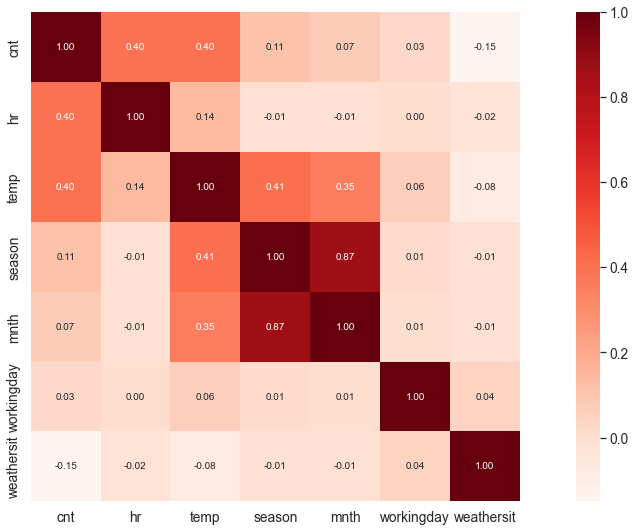

In [61]:
plt.figure(figsize=(20, 9))
k=13
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Reds")
plt.show()

In [62]:
train_target = train['cnt']

train_feature = train.drop(['cnt'], axis=1)
train_target.shape, train_feature.shape

((11999,), (11999, 6))

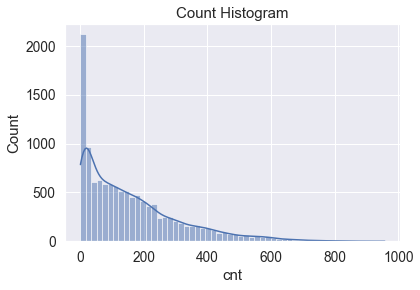

In [63]:
plt.title('Count Histogram')
sns.histplot(train_target, kde=True)
plt.show()

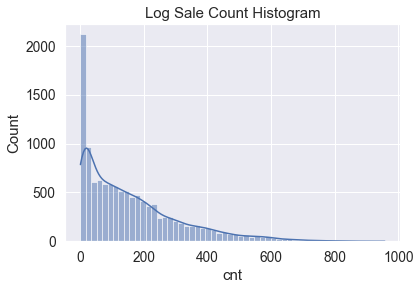

In [64]:
plt.title('Log Sale Count Histogram')
train_target_log = np.log1p(train_target)

sns.histplot(train_target, kde=True)
plt.show()

In [65]:
train_target.describe()

count    11999.000000
mean       158.594966
std        151.392952
min          1.000000
25%         34.000000
50%        118.000000
75%        232.000000
max        957.000000
Name: cnt, dtype: float64

In [66]:
# One Hot Encoding 
train_featute_ohe = pd.get_dummies(train_feature, columns=['season', 'weathersit', 'mnth', 'hr'])
test_featute_ohe = pd.get_dummies(test, columns=['season', 'weathersit', 'mnth', 'hr'])
train_featute_ohe
# 10886 rows × 71 columns
train_featute_ohe.columns 

Index(['workingday', 'temp', 'season_1', 'season_2', 'season_3', 'season_4',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [67]:
test_featute_ohe.columns

Index(['workingday', 'temp', 'season_1', 'season_2', 'season_3', 'season_4',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [68]:
test_featute_ohe.insert(9, 'mnth_1', 0)
test_featute_ohe.insert(10, 'mnth_2', 0)
test_featute_ohe.insert(11, 'mnth_3', 0)
test_featute_ohe.insert(12, 'mnth_4', 0)


In [69]:
test_featute_ohe.insert(9, 'weathersit_4',0)


In [70]:
test_featute_ohe.columns

Index(['workingday', 'temp', 'season_1', 'season_2', 'season_3', 'season_4',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [71]:
train_featute_ohe = pd.get_dummies(train_feature, columns=['season', 'weathersit', 'mnth', 'hr'])
train_featute_ohe

,workingday,temp,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0.24,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.22,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.22,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.24,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.24,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0.60,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11996,0,0.58,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,0,0.56,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
test_featute_ohe.columns.shape

(46,)

In [73]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_featute_ohe, train_target_log, test_size=0.2, random_state=42)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((9599, 46), (2400, 46), (9599,), (2400,))

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [74]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [75]:
tf.random.set_seed(42)

model = Sequential([
    Dense(200, activation='tanh', use_bias=True),
    Dense(200, activation='tanh', use_bias=True),
    Dense(1)
])


model.compile(
    loss=rmse,
    optimizer='adam',
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
300/300 [==============================] - 1s 2ms/step - loss: 0.7987 - rmse: 0.7987
Epoch 2/200
300/300 [==============================] - 0s 1ms/step - loss: 0.6480 - rmse: 0.6480
Epoch 3/200
300/300 [==============================] - 0s 2ms/step - loss: 0.5236 - rmse: 0.5236
Epoch 4/200
300/300 [==============================] - 0s 2ms/step - loss: 0.4589 - rmse: 0.4589
Epoch 5/200
300/300 [==============================] - 0s 2ms/step - loss: 0.4505 - rmse: 0.4505
Epoch 6/200
300/300 [==============================] - 1s 2ms/step - loss: 0.4447 - rmse: 0.4447
Epoch 7/200
300/300 [==============================] - 0s 2ms/step - loss: 0.4401 - rmse: 0.4401
Epoch 8/200
300/300 [==============================] - 0s 2ms/step - loss: 0.4396 - rmse: 0.4396
Epoch 9/200
300/300 [==============================] - 0s 2ms/step - loss: 0.4377 - rmse: 0.4377
Epoch 10/200
300/300 [==============================] - 0s 2ms/step - loss: 0.4332 - rmse: 0.4332
Epoch 11/200
300/300 [=======

In [76]:
predictions = model.predict(X_validation)

75/75 [==============================] - 0s 1ms/step


In [77]:
predictions = np.ravel(predictions)

In [78]:
rmse(y_validation, predictions).numpy()

0.4534407022281611

In [79]:
predictions

array([4.708313 , 2.0400376, 6.1729   , ..., 6.0889616, 5.315602 ,
       5.676773 ], dtype=float32)

In [80]:
predictions = np.expm1(predictions)

In [81]:
predictions

array([109.864975 ,   6.6908984, 478.57495  , ..., 439.9633   ,
       202.48694  , 291.0056   ], dtype=float32)

In [82]:
pred = model.predict(test_featute_ohe)


169/169 [==============================] - 0s 1ms/step


In [83]:
pred[0:10]

array([[2.2162023],
       [2.0845973],
       [3.0556433],
       [3.965696 ],
       [5.0076146],
       [5.4050198],
       [5.7346087],
       [6.19277  ],
       [6.213039 ],
       [6.268775 ]], dtype=float32)

In [87]:
predicted_count = np.expm1(pred)
predicted_count[0:10]

array([[  8.17243 ],
       [  7.041353],
       [ 20.234842],
       [ 51.75698 ],
       [148.54758 ],
       [221.52061 ],
       [308.39188 ],
       [488.1993  ],
       [498.21603 ],
       [526.8304  ]], dtype=float32)

In [88]:
predicted_count = np.round(predicted_count, 2)
predicted_count[0:10]

array([[  8.17],
       [  7.04],
       [ 20.23],
       [ 51.76],
       [148.55],
       [221.52],
       [308.39],
       [488.2 ],
       [498.22],
       [526.83]], dtype=float32)

In [91]:
pred_red_neu = pd.DataFrame(predicted_count, columns = ['pred'])

In [93]:
pred_red_neu.to_csv('TeffaHM.csv', header=True, index=False)